Basic Exploratory Data Analysis (EDA) Shape of dataset, Summary statistics,Missing values,Distribution of scores (Math, Reading, Writing)
Score Comparison Analysis Compare how different groups perform: By Gender,Average Math/Reading/Writing Scores by gender,Boxplots of score differences,By Race/Ethnicity Which group performs best overall? Use bar charts or grouped boxplots By Parental Education, Does higher parental education = higher student performance?, By Lunch Type Compare scores for: standard lunch, free/reduced lunch(This often shows socioeconomic effects) By Test Preparation Course How much does completing the course improve scores?
3.Correlation Analysis Useful to understand relationships: Math vs Reading,Reading vs Writing,Math vs Writing,Correlation heatmap You may find very strong relationships between reading and writing.
Total Score & Performance Analysis Then analyze: Score distribution Top-performing vs low-performing groups Which factors influence highest scores?
Data Visualization Great for presentation: Histograms,Boxplots,Heatmaps,Bar plots grouped by categories,Scatter plots (math vs reading)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
df = pd.read_csv("StudentsPerformance.csv")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [3]:
df["parental level of education"].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [4]:
df["race/ethnicity"].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [5]:
df["lunch"].unique()

array(['standard', 'free/reduced'], dtype=object)

In [6]:
df["test preparation course"].unique()

array(['none', 'completed'], dtype=object)

In [7]:
df.shape

(1000, 8)

In [8]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

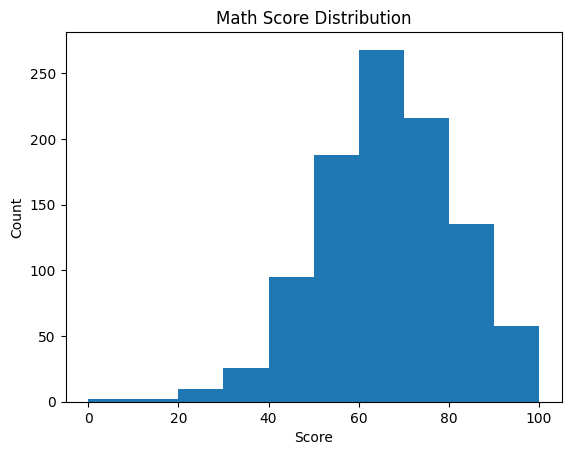

In [10]:
plt.hist(df["math score"])
plt.title("Math Score Distribution")
plt.xlabel("Score")
plt.ylabel("Count")
plt.show()

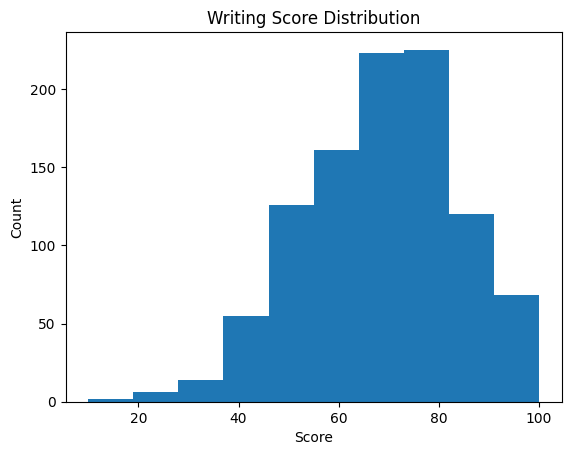

In [11]:
plt.hist(df['writing score'])
plt.title("Writing Score Distribution")
plt.xlabel("Score")
plt.ylabel("Count")
plt.show()

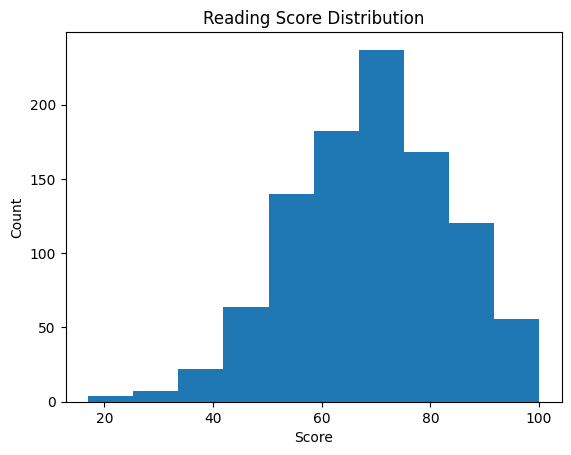

In [12]:
plt.hist(df['reading score'])
plt.title("Reading Score Distribution")
plt.xlabel("Score")
plt.ylabel("Count")
plt.show()

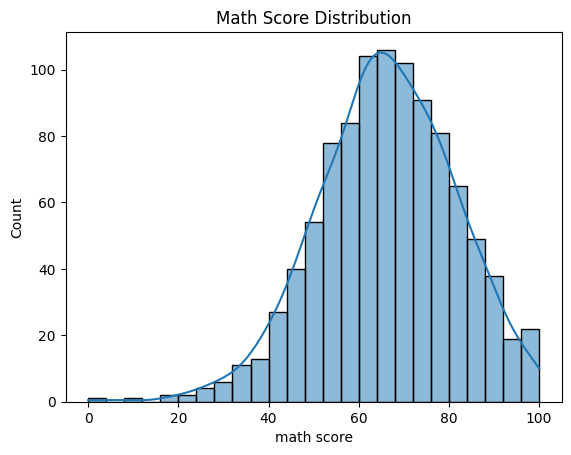

In [13]:
sns.histplot(df["math score"], kde = True)
plt.title("Math Score Distribution")
plt.show()

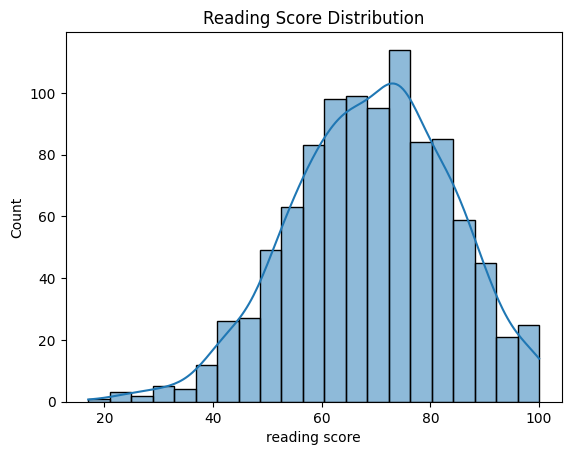

In [14]:
sns.histplot(df["reading score"], kde=True)
plt.title("Reading Score Distribution")
plt.show()

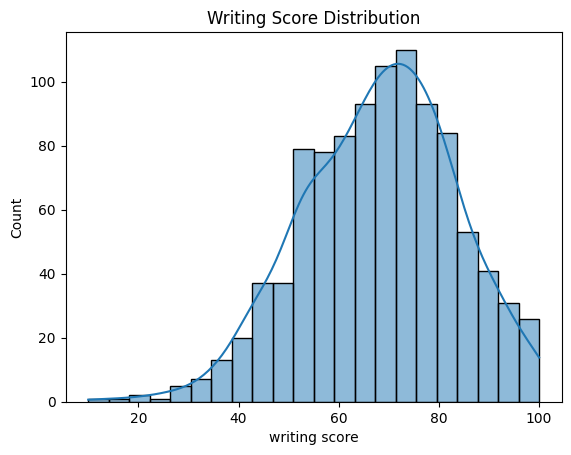

In [15]:
sns.histplot(df["writing score"], kde=True)
plt.title("Writing Score Distribution")
plt.show()

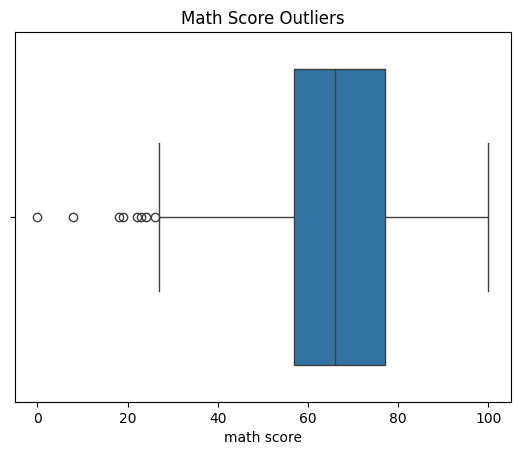

In [16]:
sns.boxplot(x=df["math score"])
plt.title("Math Score Outliers")
plt.show()

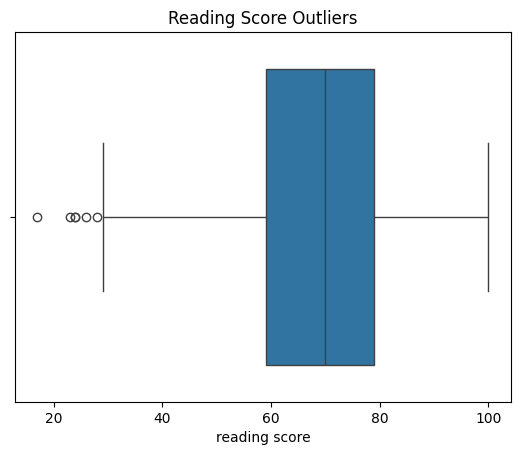

In [17]:
sns.boxplot(x=df["reading score"])
plt.title("Reading Score Outliers")
plt.show()

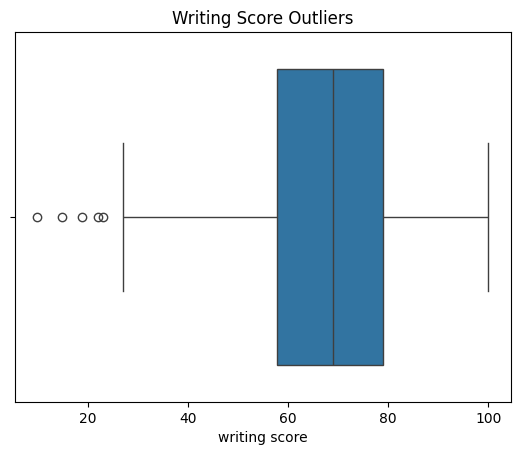

In [18]:
sns.boxplot(x=df["writing score"])
plt.title("Writing Score Outliers")
plt.show()

**By Gender,Average Math/Reading/Writing Scores by gender, Boxplots of score differences**

In [19]:
df.groupby("gender")[["math score", "reading score", "writing score"]].mean()

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


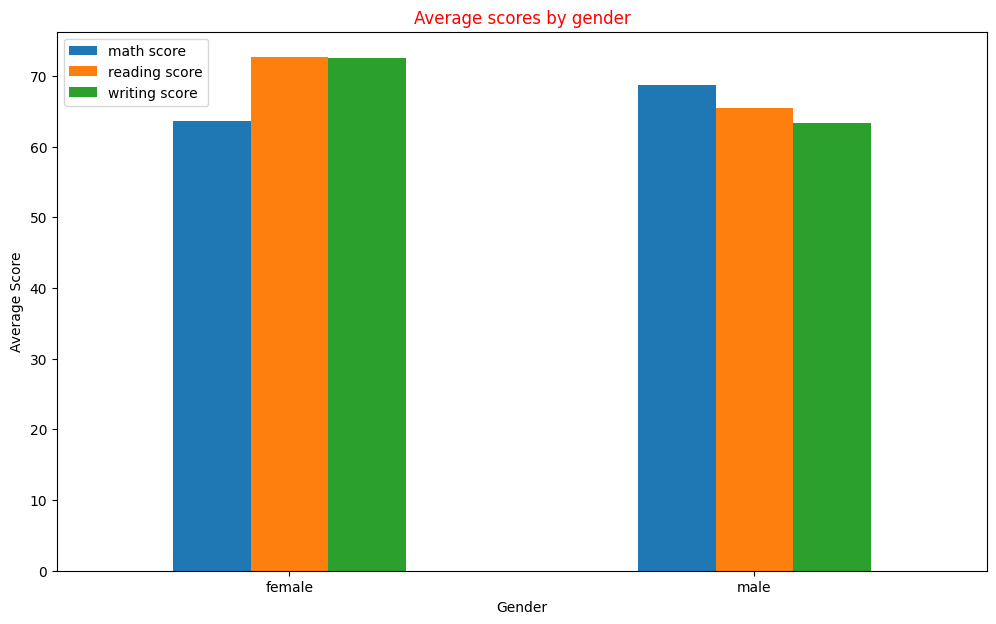

In [20]:
df.groupby("gender")[["math score", "reading score", "writing score"]].mean().plot(kind = "bar", figsize=(12,7))
plt.title("Average scores by gender" , color = "red")
plt.legend (loc = "upper left")
plt.xlabel("Gender")
plt.ylabel("Average Score")
plt.xticks(rotation = 0)
plt.show()

INTERPRETATION: Males got highest approx 68 score in maths compare to female,
while females got highest scores in reading and writing.

In [21]:
df.groupby("race/ethnicity")[["math score", "reading score", "writing score"]].mean()

,math score,reading score,writing score
race/ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


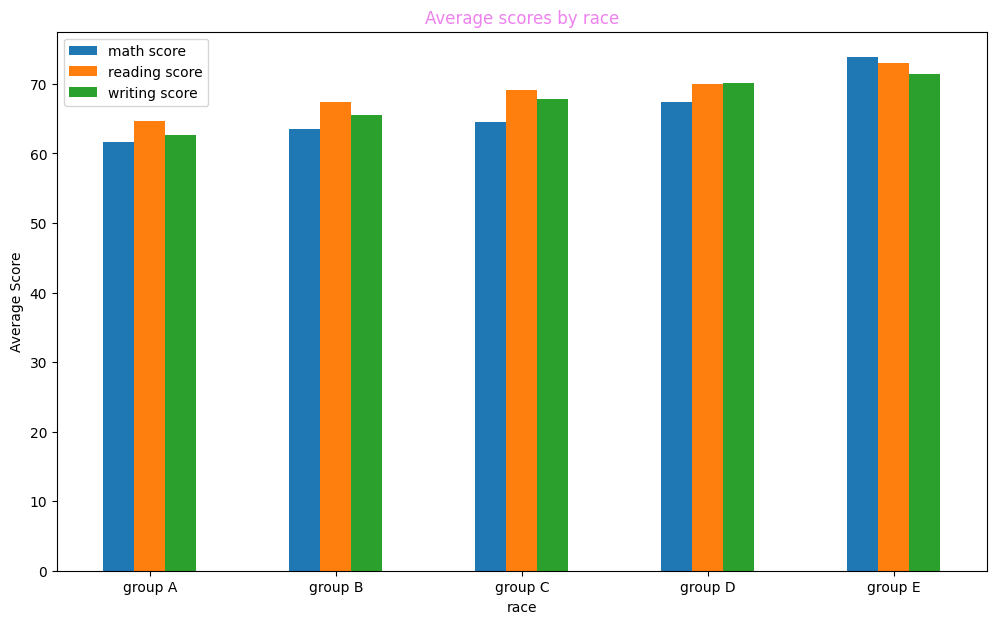

In [22]:
df.groupby("race/ethnicity")[["math score", "reading score", "writing score"]].mean().plot(kind = "bar", figsize=(12,7))
plt.title("Average scores by race" , color = "violet" , fontsize = 12)
plt.legend (loc = "upper left")
plt.xlabel("race")
plt.ylabel("Average Score")
plt.xticks(rotation = 0)
plt.show()

INTERPRETATION: Group E score highest marks in all subjects whereas Group A score lowest marks

In [23]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

**Use bar charts or grouped boxplots By Parental Education, Does higher parental education = higher student performance?**

In [24]:
df.groupby("parental level of education")[["math score", "reading score", "writing score"]].mean()

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


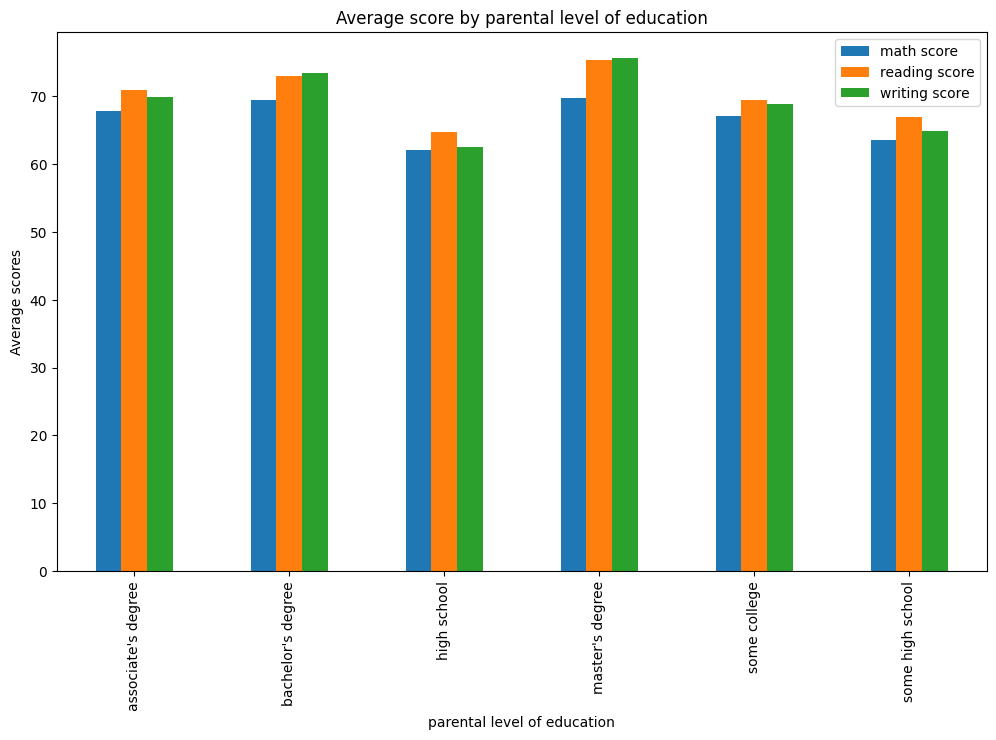

In [25]:
df.groupby("parental level of education")[["math score", "reading score", "writing score"]].mean().plot(kind= "bar", figsize = (12,7))
plt.title("Average score by parental level of education")
plt.xlabel("parental level of education")
plt.ylabel("Average scores")
plt.show()

INTERPRETATION: students having parents with master's degree score high marks compare to other student's parents

**By Lunch Type Compare scores for: standard lunch, free/reduced lunch(This often shows socioeconomic effects)**

In [26]:
df.groupby("lunch")[["math score", "reading score", "writing score"]].mean()

,math score,reading score,writing score
lunch,,,
free/reduced,58.921127,64.653521,63.022535
standard,70.034109,71.654264,70.823256


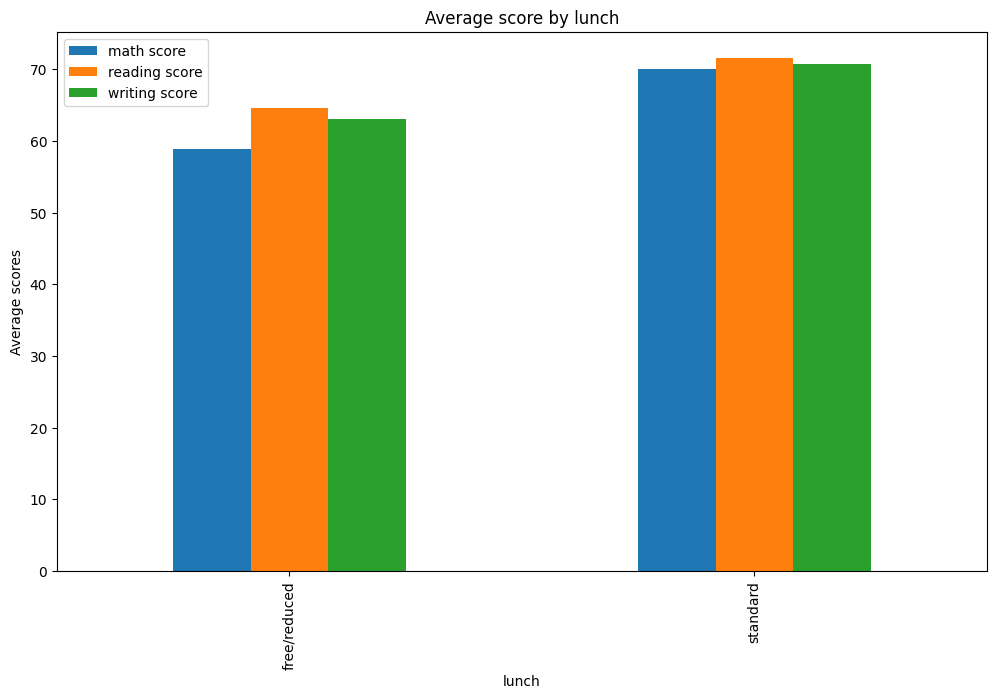

In [27]:
df.groupby("lunch")[["math score", "reading score", "writing score"]].mean().plot(kind= "bar", figsize = (12,7))
plt.title("Average score by lunch")
plt.xlabel("lunch")
plt.ylabel("Average scores")
plt.show()

INTERPRETATION: students with complete lunch score more than those who had free or reduced lunch.these results indicate socio economic effect.

**By Test Preparation Course How much does completing the course improve scores?**

In [28]:
df.groupby("test preparation course")[["math score", "reading score", "writing score"]].mean()

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


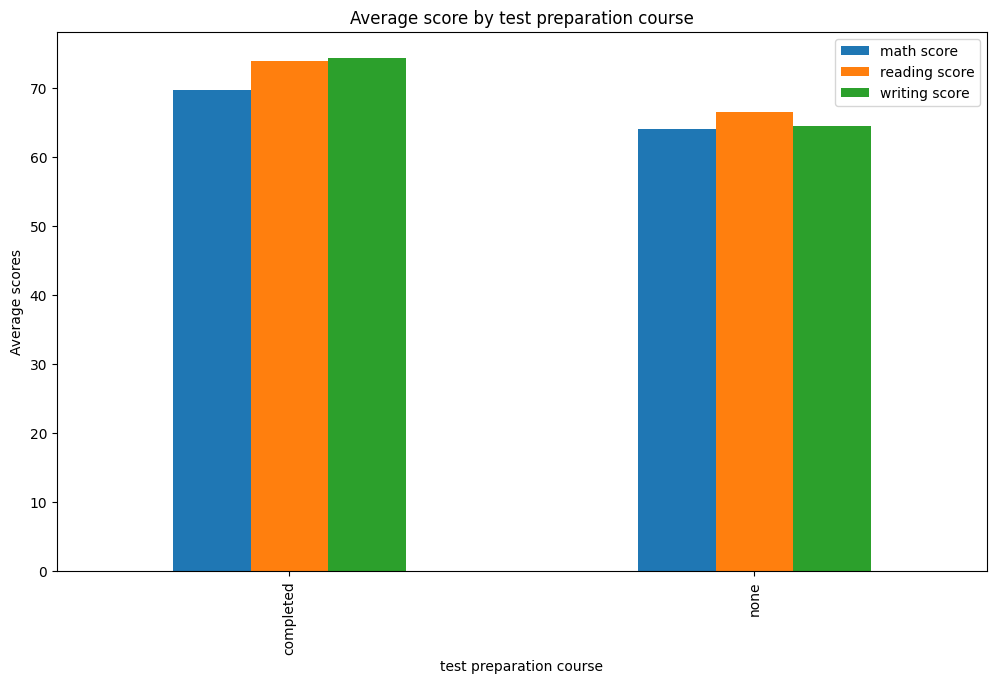

In [29]:
df.groupby("test preparation course")[["math score", "reading score", "writing score"]].mean().plot(kind= "bar", figsize = (12,7))
plt.title("Average score by test preparation course")
plt.xlabel("test preparation course")
plt.ylabel("Average scores")
plt.show()

INTERPRETATION: students who attend or go to test preparation course got highest marks in all three subjects compare to those who did not attend the course